# Вариант 1. Ряд Тейлора для синуса.

## 1. Вычисление значения синуса по первым n слагаемым формулы Тейлора

Заметим, что ряд тейлора для синуса можно записать следующим образом: $$sin(x) = \sum_{n=0}^{\infin} \frac{(-1)^nx^{2n+1}}{(2n+1)!}$$

Откуда можем найти, во сколько раз каждое последующее слагаемое отличается от предыдущего:
$$\frac{\frac{(-1)^{n}x^{2n+1}}{(2n+1)!}}{\frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}} = \frac{-x^2}{2n(2n+1)}$$

Значит, зная предыдущее слагаемое, необязательно считать новое как отношение степеной функциии и факториала. Таким образом:

In [44]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
def mysin(x, n):
    x = x % (2 * np.pi) # для более точного результата при x > 2pi и малых значениях n воспользуемся свойством периодичности синуса
    return np.sum(((-1) ** np.arange(n)) * (x ** (2 * np.arange(n) + 1) / factorial(2 * np.arange(n) + 1)))

Рассмотрим зависимость функции `mysin(x, n)` от параметра n на примере графиков. Для этого напишем функцию:

In [46]:
def draw_plots(ns): 
    # В качестве параметра принимает список значений n,
    # на основе которых строит графики полученных функций mysin(x, n) на отрезке [0, 2pi]
    xs = np.linspace(0, 2 * np.pi, 500)
    for n in ns:
        ys = np.array([mysin(i, n) for i in xs])
        plt.plot(xs, ys)
        plt.title(f"mysin(x, {n})")
        ax = plt.gca()
        ax.set_aspect(1.0)
        ax.axhline(0, color='black', lw=2)
        ax.axvline(0, color='black', lw=2)
        ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        ax.grid()
        plt.xlim([-0.25, np.pi * 2 + 0.25])
        plt.ylim([-1.25, 1.25])
        plt.show()

Рассмотрим графики на значениях $n$ от 1 до 10:

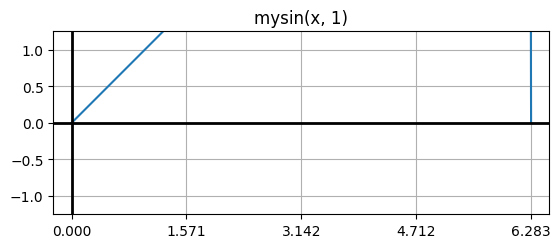

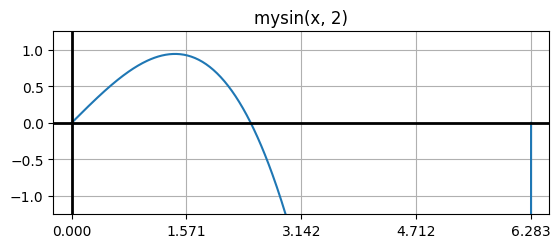

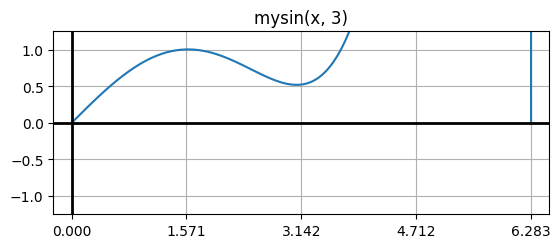

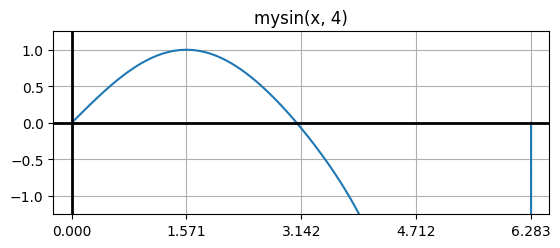

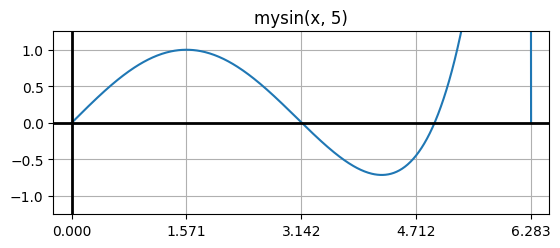

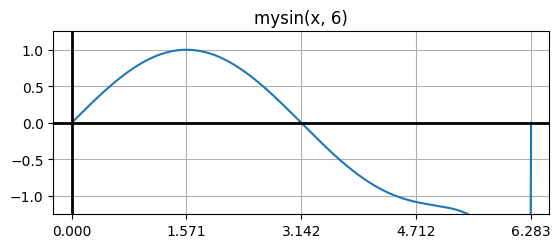

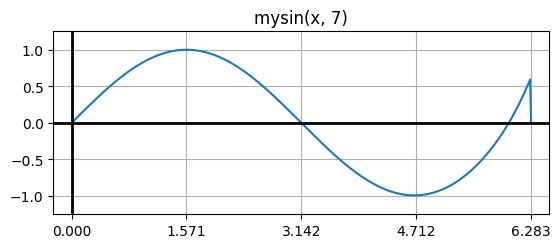

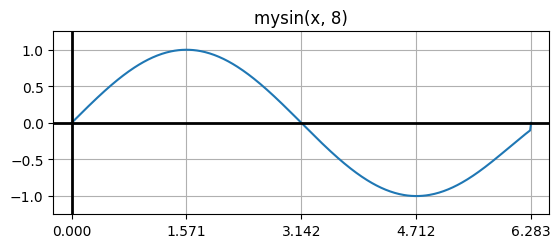

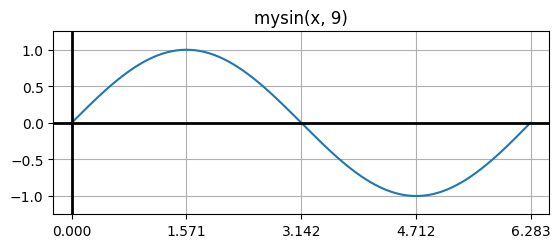

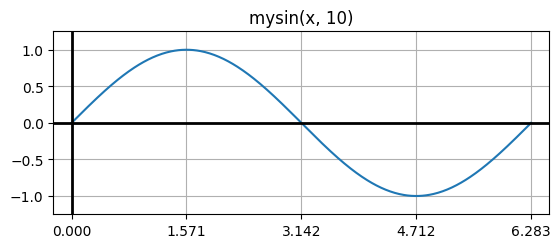

In [47]:
draw_plots(range(1, 11))

По графикам можем заметить, что чем больше слагаемых используется - тем точнее результат функции. 

## 2. Вычисление значения синуса заданной точности

Чем больше слагаемых - тем точнее результат. Так как истинное значение синуса - сумма бесконечного ряда, то манипулируя количеством слагаемых, мы можем получать значение синуса с любой, ограниченной только возможностями компьютера заданной точностью.

In [48]:
def mysine(x, tol=1e-16):
    x = x % (2 * np.pi)
    n = 1
    amount = x
    summand = x
    while abs(summand) > tol:
        summand *= - x ** 2 / ((2 * n) * (2 * n + 1))
        amount += summand
        n += 1
    return [amount, n]    

Простестируем функцию на примерах:

In [49]:
test_values = [np.pi / 2, np.pi * 11 / 2, np.pi * 21 / 2, np.pi * 31 / 2]
refers = [1, -1, 1, -1]

for x in test_values:
    print('Значение %s получено на %s итерациях' % tuple(mysine(x)))


Значение 1.0000000000000002 получено на 12 итерациях
Значение -1.000000000000001 получено на 18 итерациях
Значение 1.0000000000000002 получено на 12 итерациях
Значение -1.000000000000001 получено на 18 итерациях


Как можем заметить, для получения значения синуса заданной точности, требуется сложить 18 членов. Заметим, что максимальным по модулю членом в любом ряду является значение $x$.

Напишем еще одну функцию, которая покажет нам график зависмости точности от числа используемых слагаемых:

In [50]:
def draw_accuracy(x, reference):
    xs = np.array(range(1, 51))
    ys = np.array([reference - mysin(x, n) for n in xs])
    plt.plot(xs, ys)
    plt.grid()
    plt.show()

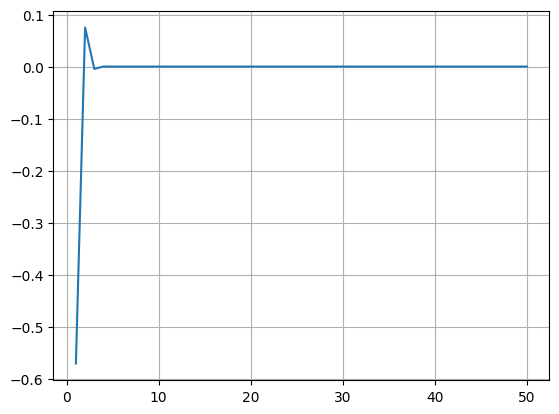

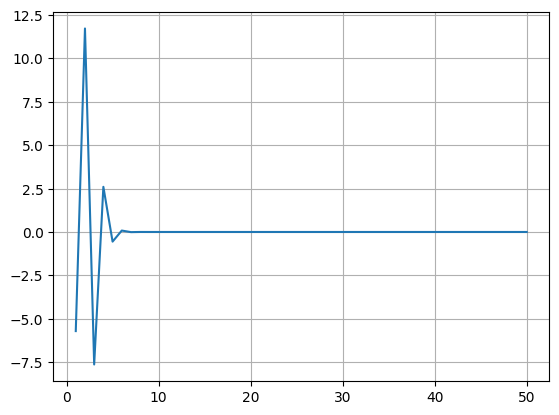

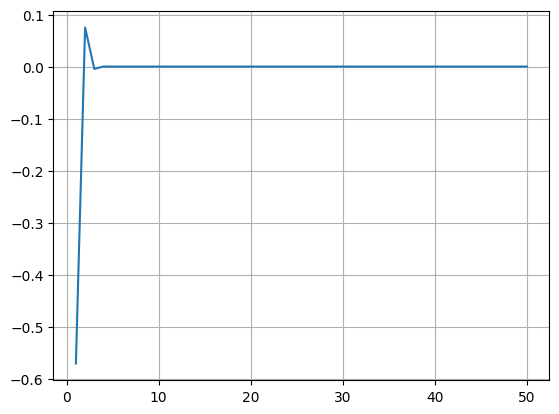

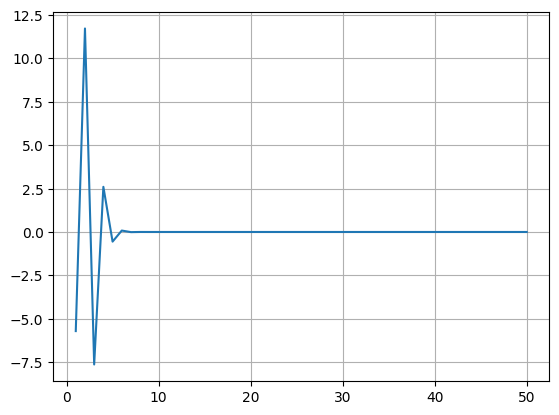

In [51]:
for i in range(len(test_values)):
    draw_accuracy(test_values[i], refers[i])

Несмотря на то, что график зависимости точности от количества членов стремится к нулю, его он никогда не достигает. Это обусловлено спецификой компьютерных вычислений: во-первых, невозможно точно представить число $\pi$ - оно иррационально, мы работаем только с его приближениями; во-вторых, ресурсы любого компьютера ограничены - чтобы получить истинное значение синуса, потребуется просуммировать бесконечный ряд, чего мы, по понятным причинам, сделать не можем. Также от цели нас ограждает конкретная реалиция типов, в нашем случае `float` в Python.